# Pyber Ride Sharing 

## Analysis 
    
- More than 70% of rides are occuring in urban cities which also gathers more than 60% of the total fare rate.
- When 8 out of 10 drivers ride in urban cities and 7 out of 10 rides occurs in urban cities, fares in suburban and rural cities are surpassing the urban ride costs.
- There is a significant difference in average fares of city types, the more rural a city is the higher expenses will be expected.


## Plots and Charts

In [70]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [71]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [72]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [73]:
# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

### Correlation between the variables:
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

In [76]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]

# Urban cities
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_average_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

# Suburban cities
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_average_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

# Rural cities
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_average_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

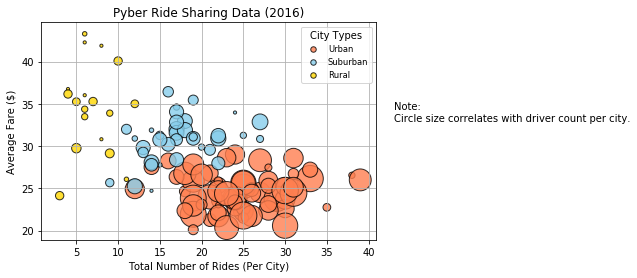

In [79]:
# Scatter plots for each city types (ride counts positions in x axis, average fare positions in y axis, size displays driver counts)
plt.scatter(urban_ride_count, urban_average_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_average_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count, rural_average_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc="best", fontsize="small", fancybox=True, title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(43, 33, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Ride Sharing Data Plot.png")

# Show plot
plt.show()

# Total Fares by City Type

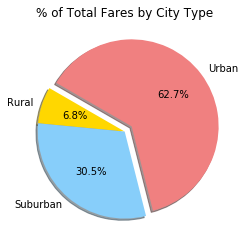

In [80]:
# Calculate Type Percents
type_percentages = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()

# Build Pie Chart
city_types = ["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0, 0, 0.1]

plt.pie(type_percentages, explode=explode, labels=city_types, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total Fares by City Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

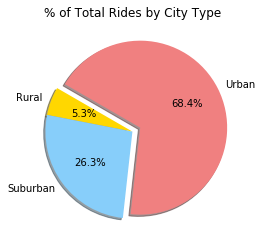

In [81]:
# Calculate Ride Percents
ride_percentages = 100 *city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()

# Build Pie Chart
city_types = ["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0, 0, 0.1]

plt.pie(ride_percentages, explode=explode, labels=city_types, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total Rides by City Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

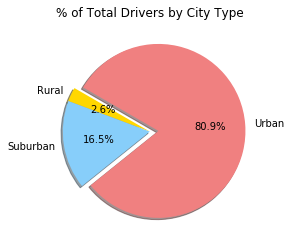

In [82]:
# Calculate Driver Percents
driver_percentages = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

# Build Pie Charts
city_types = ["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0, 0, 0.1]

plt.pie(driver_percentages, explode=explode, labels=city_types, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total Drivers by City Type")

# Show Figure
plt.show()
